In [74]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,235,145,Andre Marriner,2,0,1,0,11,8,0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,213,98,Martin Atkinson,2,0,2,0,11,12,1
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,191,100,Kevin Friend,1,0,1,0,11,9,0
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,223,101,Mike Dean,1,0,2,0,9,11,0
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,169,77,Chris Kavanagh,2,0,1,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,267,145,Martin Atkinson,0,0,2,0,3,11,0
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,235,145,Jonathan Moss,3,0,3,0,9,6,0
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,207,108,Lee Probert,0,0,1,0,8,6,0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,236,124,Andre Marriner,0,0,2,0,10,13,0


In [75]:
matches_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 379
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   result                                380 non-null    int64  
 1   performance_rank_home                 380 non-null    int64  
 2   home_team_name                        380 non-null    object 
 3   B365H                                 380 non-null    float64
 4   B365D                                 380 non-null    float64
 5   B365A                                 380 non-null    float64
 6   away_team_name                        380 non-null    object 
 7   away_performance_rank                 380 non-null    int64  
 8   Pre-Match PPG (Home)                  380 non-null    float64
 9   Pre-Match PPG (Away)                  380 non-null    float64
 10  home_team_goal_count                  380 non-null    int64  
 11  away_team_goal_count    

In [76]:
matches_info_df.describe()

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.315789,10.500000,3.289184,4.583447,5.633763,10.500000,1.480895,1.167632,1.568421,1.252632,...,4.557895,215.300000,109.450000,1.544737,0.047368,1.715789,0.076316,10.160526,10.281579,0.300000
std,1.915156,5.773884,3.264296,1.944515,5.920971,5.773884,0.831446,0.761209,1.312836,1.180031,...,2.731487,33.315625,23.797854,1.228766,0.212706,1.208267,0.275599,3.287944,3.490232,0.458862
min,-5.000000,1.000000,1.060000,3.000000,1.120000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,169.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,-1.000000,5.750000,1.570000,3.500000,2.300000,5.750000,1.000000,0.630000,1.000000,0.000000,...,2.750000,190.500000,97.000000,1.000000,0.000000,1.000000,0.000000,8.000000,8.000000,0.000000
50%,0.000000,10.500000,2.300000,3.800000,3.400000,10.500000,1.470000,1.075000,1.000000,1.000000,...,4.000000,213.000000,104.500000,1.000000,0.000000,2.000000,0.000000,10.000000,10.000000,0.000000
75%,2.000000,15.250000,3.250000,5.000000,6.500000,15.250000,2.062500,1.610000,2.000000,2.000000,...,6.000000,235.250000,119.500000,2.000000,0.000000,2.000000,0.000000,12.000000,12.250000,1.000000
max,6.000000,20.000000,23.000000,17.000000,41.000000,20.000000,3.000000,3.000000,6.000000,6.000000,...,14.000000,307.000000,167.000000,6.000000,1.000000,5.000000,2.000000,23.000000,21.000000,1.000000


In [77]:
# Identificação das colunas com valores nulos e contagem dos valores nulos
null_counts = matches_info_df.isnull().sum()

# Filtragem das colunas que possuem valores nulos
null_counts = null_counts[null_counts > 0]

# Print das colunas com valores nulos e suas respectivas contagens
print(null_counts)

home_team_goal_timings              88
away_team_goal_timings             119
home_team_shots_on_target_dirty    114
dtype: int64


### verifying if there is some real NANs home_team_timings or those games just doesnt had a goal

In [78]:
def verifying_nans(column_to_verify, auxiliar_column):
   # Identify rows where 'home_team_goal_timings' is null
    goal_timings_null = matches_info_df[column_to_verify].isnull()

    # Save the indices of the rows where 'home_team_goal_timings' is null
    null_rows = matches_info_df[goal_timings_null].index

    # Check if the column 'home_team_goal_count' is 0 in the rows with null indices
    any_incorrect = (matches_info_df.loc[null_rows, auxiliar_column] != 0).any()

    # Print the result
    print(f'Does exist {column_to_verify} left? {any_incorrect}')

verifying_nans('home_team_goal_timings', 'home_team_goal_count')
verifying_nans('away_team_goal_timings', 'away_team_goal_count')

Does exist home_team_goal_timings left? False
Does exist away_team_goal_timings left? False


### So, as we could see, those NANs are just cause this team doesnt make a goal this match

### Lets check the column home_team_shots_on_target_dirty

In [79]:
def verifying_target_shots_nans(column_to_verify, auxiliary_column):
    # Calculate the sum of the 'column_to_verify'
    target_shots_count = matches_info_df[column_to_verify].sum()

    # Calculate the total count expected for the 'auxiliary_column'
    # Assuming a team plays 19 times at home and there are 20 teams 
    # (19x20= 380 the size of data frame), the total count is divided by 19
    # so we divided by 19 cause we want the total shots on target of each team
    target_shots_total_count = matches_info_df[auxiliary_column].sum() / 19

    # Print the result
    if target_shots_count == target_shots_total_count:
        print(f'The column {column_to_verify} has data missing? False')
    else:
        print(f'The column {column_to_verify} has data missing? True')

# Verify missing data for 'home_team_shots_on_target_dirty' column using 'home_season_shots_on_target' as the auxiliary column
verifying_target_shots_nans('home_team_shots_on_target_dirty', 'home_season_shots_on_target')

# Verify missing data for 'home_team_shots_on_target_original' column using 'home_season_shots_on_target' as the auxiliary column
verifying_target_shots_nans('home_team_shots_on_target_original', 'home_season_shots_on_target')

The column home_team_shots_on_target_dirty has data missing? True
The column home_team_shots_on_target_original has data missing? False


so we could see that yes!, there are some data missing

In [80]:
print(matches_info_df.home_team_shots.describe())
matches_info_df.home_team_shots_on_target_dirty.describe()

count    380.000000
mean      11.331579
std        4.278011
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       26.000000
Name: home_team_shots, dtype: float64


count    266.000000
mean       5.943609
std        2.652271
min        0.000000
25%        4.000000
50%        6.000000
75%        7.750000
max       15.000000
Name: home_team_shots_on_target_dirty, dtype: float64

In [81]:
matches_info_df.home_team_shots_on_target_dirty.describe()

count    266.000000
mean       5.943609
std        2.652271
min        0.000000
25%        4.000000
50%        6.000000
75%        7.750000
max       15.000000
Name: home_team_shots_on_target_dirty, dtype: float64

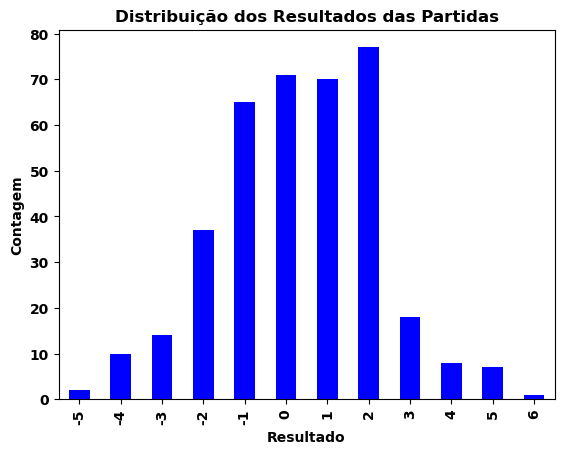

In [82]:
# Contar os resultados
result_counts = matches_info_df['result'].value_counts()

# Ordenar os resultados
result_counts_sorted = result_counts.sort_index()

# Plotar a distribuição dos resultados ordenados
result_counts_sorted.plot(kind='bar', color='blue')
plt.title('Distribuição dos Resultados das Partidas')
plt.xlabel('Resultado')
plt.ylabel('Contagem')
plt.show()

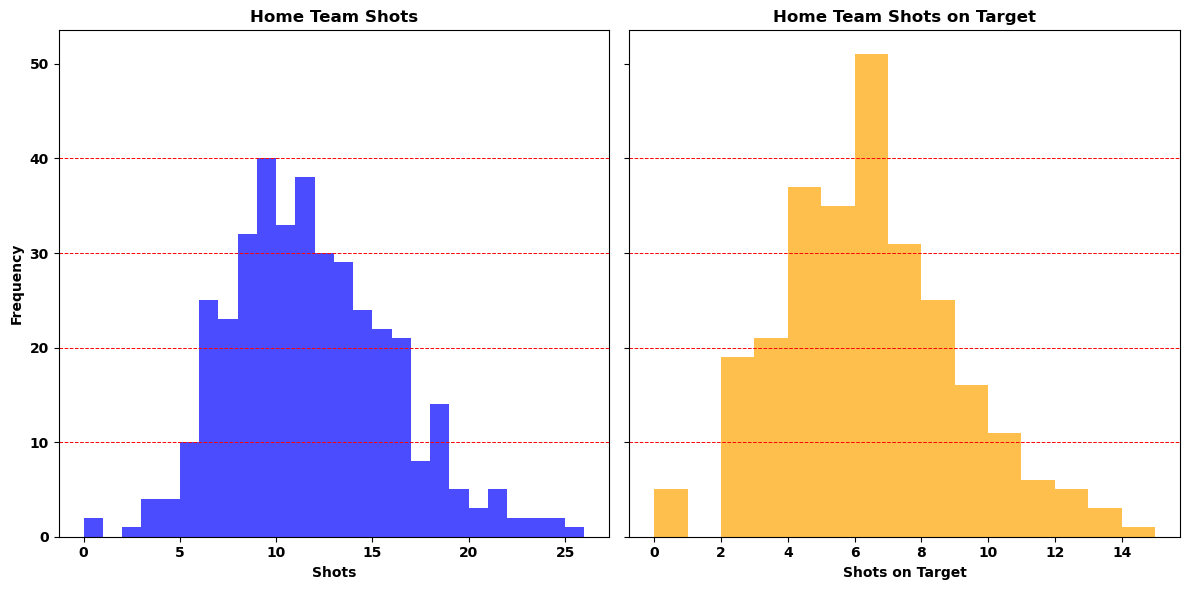

In [83]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty']

# Criação dos plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot do histograma de general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Adição das linhas tracejadas verdes
for y in [40, 30, 20, 10]:
    ax1.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='red', linestyle='--', linewidth=0.7)

# Plot do histograma de shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Ajuste do layout
plt.tight_layout()
plt.show()

<Axes: >

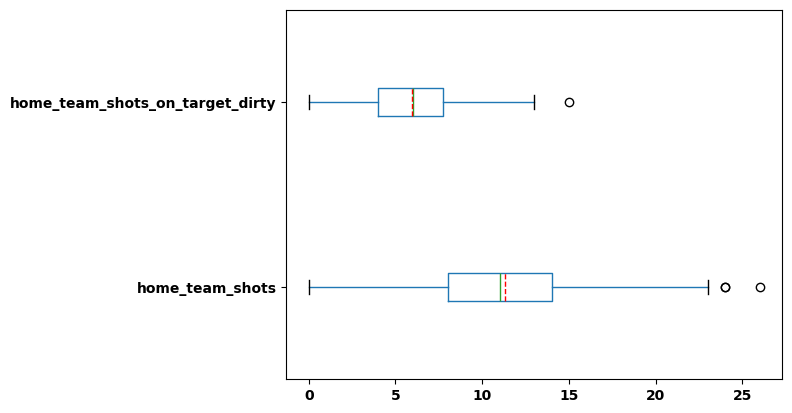

In [84]:
matches_info_df.boxplot(column=['home_team_shots', 'home_team_shots_on_target_dirty'], grid=False, vert=False,  showmeans=True, meanline=True, meanprops=dict(color='red', linestyle='--'),)


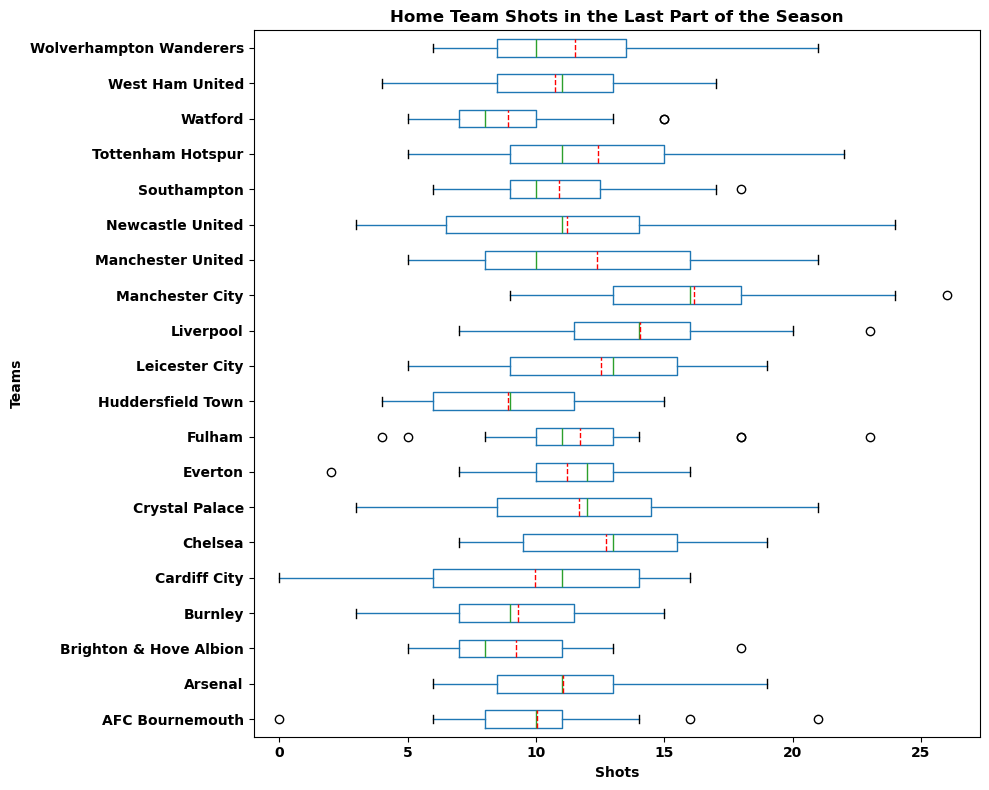

In [85]:
# Creating a pivoted DataFrame to use in the boxplot creation for the last part of the season
team_shots_df = matches_info_df.pivot(columns='home_team_name', values='home_team_shots')

# Creating the boxplots with shared x-axis
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))


# Criando o gráfico de caixa com média
team_shots_df.boxplot(vert=False, showmeans=True, meanline=True, meanprops=dict(color='red', linestyle='--'), figsize=(10, 8), grid=False)
plt.xlabel('Shots')
plt.ylabel('Teams')
plt.title('Home Team Shots in the Last Part of the Season')
plt.xlim(left=-1)

# Adjusting the layout
plt.tight_layout()
plt.show()

In [86]:
# lets see the statistics about one specific team
# Function to extract statistics of a specific team
def describing_team(column_to_verify, column_to_reference, team):
    return matches_info_df[matches_info_df[column_to_reference] == team][column_to_verify]

# Extracting data for Tottenham Hotspur
tottenham_shots = describing_team('home_team_shots', 'home_team_name', 'Tottenham Hotspur')
tottenham_shots_on_target = describing_team('home_team_shots_on_target_dirty', 'home_team_name', 'Tottenham Hotspur')

print(tottenham_shots.describe())
print(tottenham_shots_on_target.describe())

count    19.000000
mean     12.421053
std       4.586402
min       5.000000
25%       9.000000
50%      11.000000
75%      15.000000
max      22.000000
Name: home_team_shots, dtype: float64
count    13.000000
mean      6.076923
std       2.628737
min       4.000000
25%       4.000000
50%       5.000000
75%       6.000000
max      12.000000
Name: home_team_shots_on_target_dirty, dtype: float64


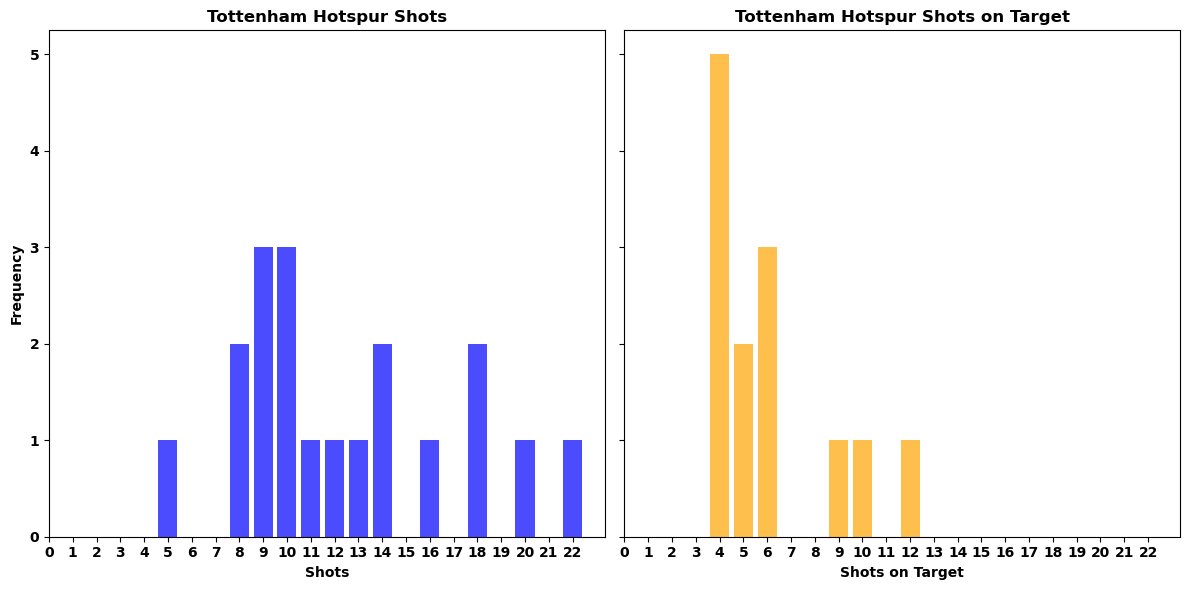

In [87]:
# Contando a frequência dos valores únicos
tottenham_shots_counts = tottenham_shots.value_counts().sort_index()
tottenham_shots_on_target_counts = tottenham_shots_on_target.value_counts().sort_index()

# Criando os gráficos de barras
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6), sharex=True)

# Gráfico de barras para total de chutes
ax1.bar(tottenham_shots_counts.index, tottenham_shots_counts.values, color='blue', alpha=0.7)
ax1.set_title('Tottenham Hotspur Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Gráfico de barras para chutes no alvo
ax2.bar(tottenham_shots_on_target_counts.index, tottenham_shots_on_target_counts.values, color='orange', alpha=0.7)
ax2.set_title('Tottenham Hotspur Shots on Target')
ax2.set_xlabel('Shots on Target')

# Ajustando os ticks do eixo x para exibir apenas números inteiros
max_shots = max(tottenham_shots_counts.index.max(), tottenham_shots_on_target_counts.index.max())
ax1.set_xticks(range(0, max_shots + 1))
ax2.set_xticks(range(0, max_shots + 1))

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

os dados de chutes na barra podem estar estanhos por conta dos dados faltantes

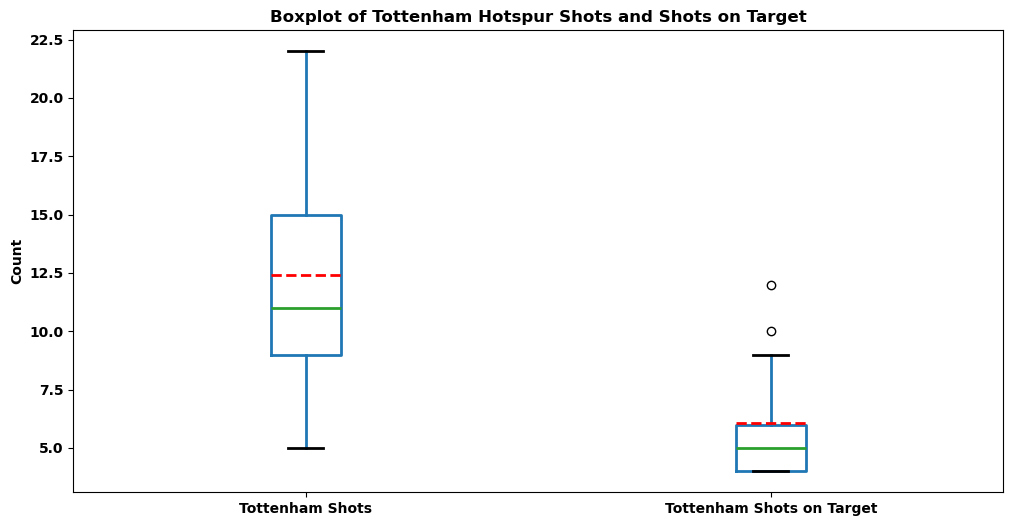

In [88]:

# Creating a DataFrame with the relevant columns for boxplot
tottenham_data = pd.DataFrame({
    'Tottenham Shots': tottenham_shots,
    'Tottenham Shots on Target': tottenham_shots_on_target
})

# Creating the boxplot
fig, ax = plt.subplots(figsize=(12, 6))
boxplot = tottenham_data.boxplot(column=['Tottenham Shots', 'Tottenham Shots on Target'], grid=False,  showmeans=True, meanline=True, meanprops=dict(color='red', linestyle='--'),)

for line in ax.lines:
    line.set_linewidth(2)

# Display the boxplot
plt.title('Boxplot of Tottenham Hotspur Shots and Shots on Target')
plt.ylabel('Count')
plt.show()

In [89]:
# how many shots a team playing home has to make to has score a goal in a match?
matches_info_df['home_shots_2_score'] = matches_info_df['home_team_shots']/matches_info_df['home_team_goal_count']
print(matches_info_df['home_shots_2_score'])

0       4.0
1      11.0
2       5.5
3       inf
4       inf
       ... 
375     5.5
376     inf
377     7.0
378     4.5
379    11.0
Name: home_shots_2_score, Length: 380, dtype: float64


In [90]:
# what was the mean of total shots from the team that was a favorite when play against
# Totthnham, in tottenham houses and tottenham won the game
# comparing the stats of all teams stats and tottenham stats
print(matches_info_df.away_team_shots.describe())

matches_info_df[(matches_info_df.home_team_name == 'Tottenham Hotspur') & 
                (matches_info_df.B365H < matches_info_df.B365A) & 
                (matches_info_df.result > 0)].away_team_shots.describe()



count    380.000000
mean       9.197368
std        3.341668
min        2.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       19.000000
Name: away_team_shots, dtype: float64


count    11.000000
mean      8.909091
std       4.592484
min       3.000000
25%       6.000000
50%       7.000000
75%      10.000000
max      19.000000
Name: away_team_shots, dtype: float64

In [91]:
# describing the statistics of shots of each team on the first part of the season
matches_info_df[matches_info_df['season_part']=='first'].groupby(['home_team_name'])['home_team_shots'].describe()

,count,mean,std,min,25%,50%,75%,max
home_team_name,,,,,,,,
AFC Bournemouth,6.0,10.666667,2.943920,8.0,8.50,10.5,11.00,16.0
Arsenal,7.0,10.285714,3.988077,7.0,7.50,9.0,11.50,18.0
Brighton & Hove Albion,6.0,9.333333,2.581989,7.0,7.25,8.5,11.25,13.0
Burnley,5.0,7.000000,2.121320,4.0,6.00,7.0,9.00,9.0
Cardiff City,7.0,11.857143,4.879500,3.0,9.50,14.0,15.50,16.0
Chelsea,7.0,13.714286,3.251373,9.0,12.00,13.0,15.50,19.0
Crystal Palace,6.0,11.500000,2.738613,8.0,9.50,11.5,13.50,15.0
Everton,6.0,12.000000,1.549193,10.0,11.00,12.0,13.00,14.0
Fulham,5.0,13.600000,5.366563,10.0,11.00,11.0,13.00,23.0


In [92]:
# describing the statistics of shots of each team on the last part of the season
matches_info_df[matches_info_df['season_part']=='last'].groupby(['home_team_name'])['home_team_shots'].describe()

,count,mean,std,min,25%,50%,75%,max
home_team_name,,,,,,,,
AFC Bournemouth,6.0,9.000000,4.898979,0.0,8.25,10.0,11.75,14.0
Arsenal,6.0,10.500000,2.738613,6.0,9.50,11.0,11.75,14.0
Brighton & Hove Albion,8.0,10.125000,4.015595,5.0,7.50,11.0,11.00,18.0
Burnley,8.0,9.625000,4.172615,3.0,7.25,10.0,12.50,15.0
Cardiff City,7.0,9.428571,4.157609,5.0,6.00,8.0,13.00,15.0
Chelsea,7.0,13.714286,3.302236,9.0,11.50,14.0,16.00,18.0
Crystal Palace,8.0,11.375000,4.033343,6.0,8.25,12.0,14.50,16.0
Everton,7.0,10.428571,5.255383,2.0,7.00,12.0,14.50,16.0
Fulham,7.0,8.857143,3.338092,4.0,6.50,10.0,11.00,13.0


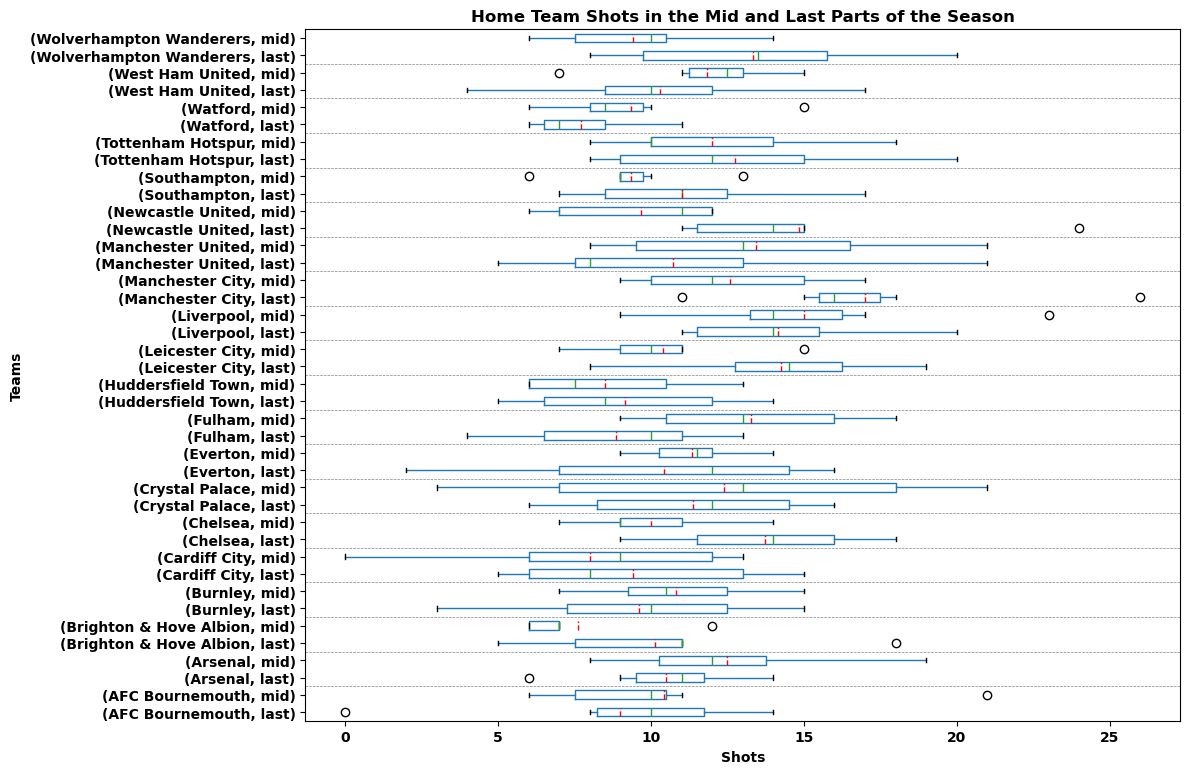

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrando os dados para incluir apenas a parte do meio da temporada
mid_season_part = matches_info_df[matches_info_df['season_part'] == 'mid']

# Criando um DataFrame pivotado para usar na criação do boxplot para a primeira parte da temporada
first_boxplot_data = mid_season_part.pivot(columns='home_team_name', values='home_team_shots')

# Filtrando os dados para incluir apenas a última parte da temporada
last_season_part = matches_info_df[matches_info_df['season_part'] == 'last']

# Criando um DataFrame pivotado para usar na criação do boxplot para a última parte da temporada
last_boxplot_data = last_season_part.pivot(columns='home_team_name', values='home_team_shots')

# Combinando os dois DataFrames, adicionando um identificador para a temporada
combined_data = pd.concat([first_boxplot_data.melt(var_name='team', value_name='shots').assign(season_part='mid'),
                           last_boxplot_data.melt(var_name='team', value_name='shots').assign(season_part='last')])

# Criando o gráfico de caixa
fig, ax = plt.subplots(figsize=(12, 8))

# Desenhando os boxplots
combined_data.boxplot(column='shots', by=['team', 'season_part'], vert=False, ax=ax, grid=False,  showmeans=True, meanline=True, meanprops=dict(color='red', linestyle='--'))

# Adicionando linhas divisórias entre cada par de times
teams = combined_data['team'].unique()
team_count = len(teams)

for i in range(1, team_count):
    plt.axhline(y=i * 2 + 0.5, color='gray', linestyle='--', linewidth=0.5)

# Ajustando o gráfico
ax.set_ylabel('Teams')
ax.set_xlabel('Shots')
ax.set_title('Home Team Shots in the Mid and Last Parts of the Season')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.tight_layout()
plt.show()


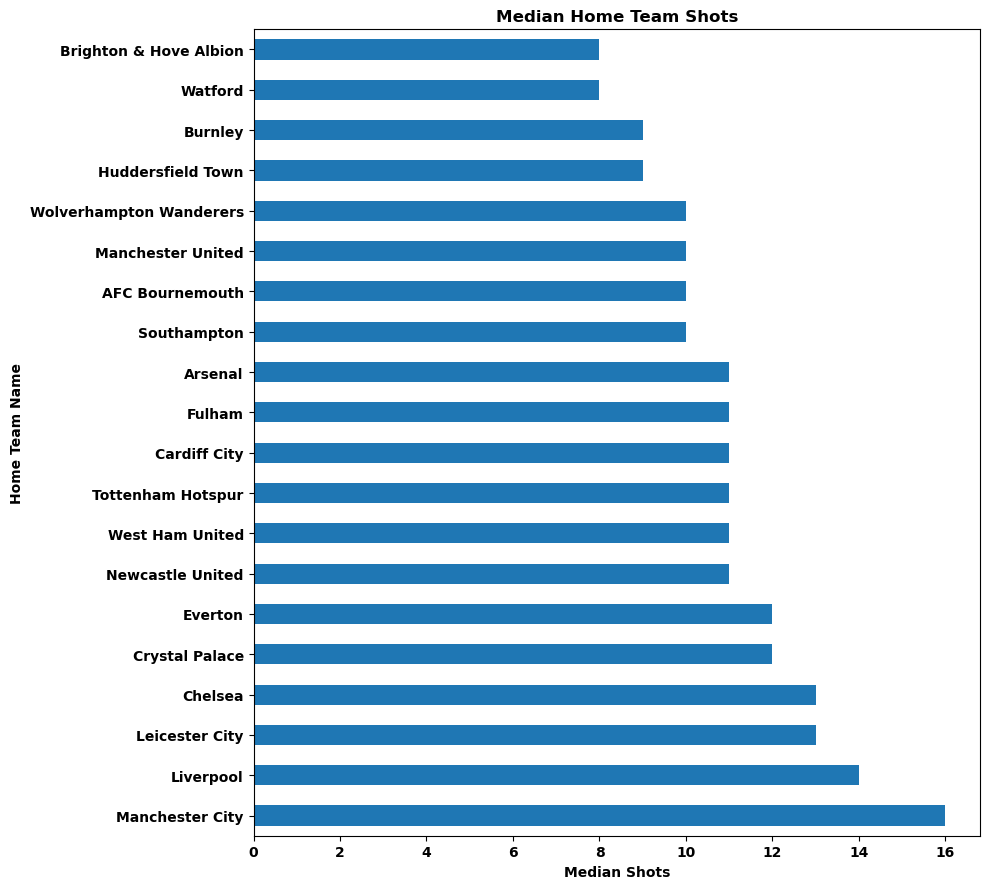

In [94]:
# Criando a figura e os subplots
fig, (ax1) = plt.subplots(nrows=1, ncols=1,sharex=True, figsize=(10, 9))

# Plotando o primeiro gráfico
matches_info_df.groupby(['home_team_name'])['home_team_shots'].median().sort_values(ascending=False).plot.barh(ax=ax1)
ax1.set_title('Median Home Team Shots')
ax1.set_xlabel('Median Shots')
ax1.set_ylabel('Home Team Name')

# Ajustando o layout
plt.tight_layout()

# Exibindo a figura
plt.show()

In [95]:
desired_columns = ['home_team_name', 'away_team_name', 'season_part', 'result', 'home_team_shots', 'home_team_shots_on_target_dirty', 'away_team_shots', 'away_team_shots_on_target']
matches_info_df[(matches_info_df['season_part'] == 'last') & ((matches_info_df['home_team_name'] == 'Manchester City') | (matches_info_df['away_team_name'] == 'Manchester City'))][desired_columns].describe()


,result,home_team_shots,home_team_shots_on_target_dirty,away_team_shots,away_team_shots_on_target
count,14.000000,14.000000,9.00000,14.000000,14.000000
mean,0.142857,10.571429,7.00000,8.857143,5.285714
std,2.444999,7.582513,4.84768,5.141941,2.643674
min,-3.000000,0.000000,0.00000,2.000000,2.000000
25%,-2.000000,4.500000,4.00000,4.250000,3.000000
50%,0.000000,9.500000,8.00000,8.500000,5.000000
75%,1.750000,16.000000,10.00000,12.750000,7.750000
max,6.000000,26.000000,13.00000,18.000000,10.000000


In [96]:
matches_info_df[(matches_info_df['season_part'] == 'last') & ((matches_info_df['home_team_name'] == 'Manchester City') | (matches_info_df['away_team_name'] == 'Manchester City'))][desired_columns]


,home_team_name,away_team_name,season_part,result,home_team_shots,home_team_shots_on_target_dirty,away_team_shots,away_team_shots_on_target
248,Manchester City,Arsenal,last,2,16,13.0,3,3
250,Everton,Manchester City,last,-2,2,NaN,9,5
259,Manchester City,Chelsea,last,6,15,10.0,8,5
278,Manchester City,West Ham United,last,1,18,8.0,3,2
280,AFC Bournemouth,Manchester City,last,-1,0,NaN,18,8
295,Manchester City,Watford,last,2,17,10.0,2,2
304,Fulham,Manchester City,last,-2,4,0.0,16,8
318,Manchester City,Cardiff City,last,2,26,12.0,4,2
332,Crystal Palace,Manchester City,last,-2,6,4.0,14,7
336,Manchester City,Tottenham Hotspur,last,1,11,NaN,8,5


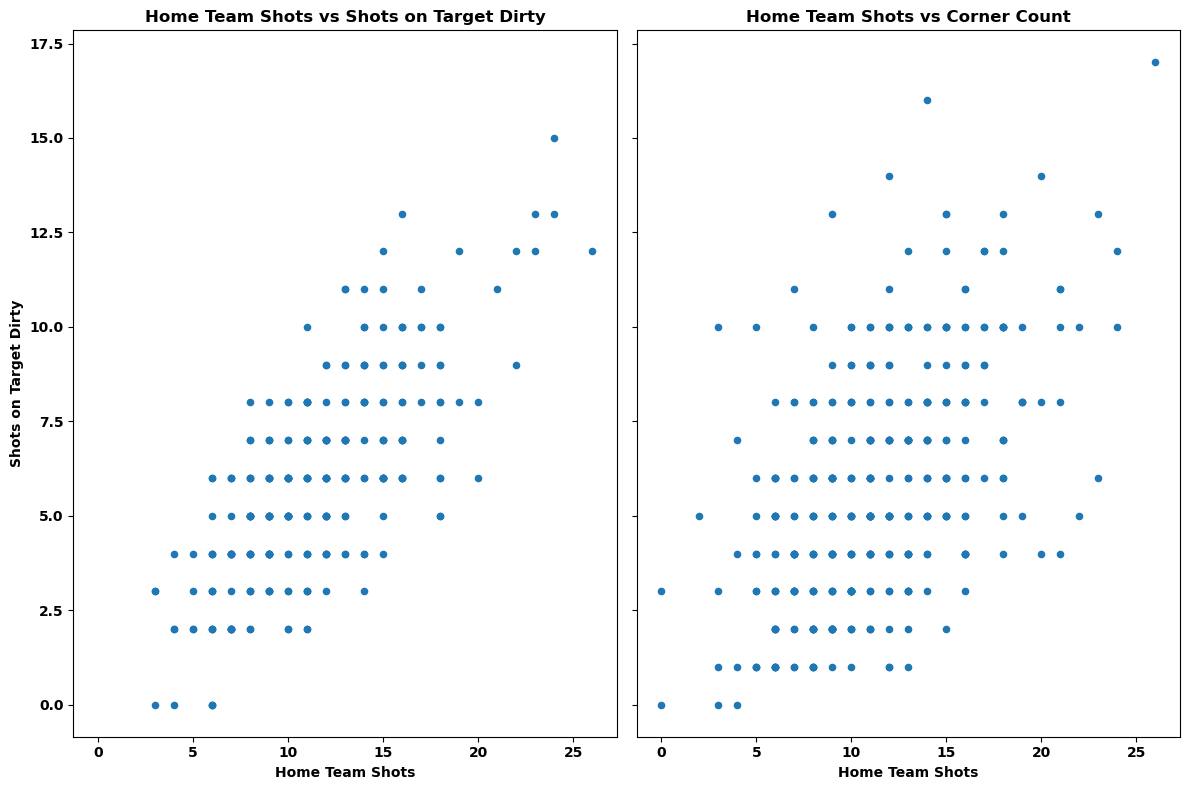

In [97]:
# Criar o figure e os subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plotar o primeiro gráfico de dispersão
matches_info_df.plot.scatter(x='home_team_shots', y='home_team_shots_on_target_dirty', ax=ax1)
ax1.set_title('Home Team Shots vs Shots on Target Dirty')
ax1.set_xlabel('Home Team Shots')
ax1.set_ylabel('Shots on Target Dirty')

# Plotar o segundo gráfico de dispersão
matches_info_df.plot.scatter(x='home_team_shots', y='home_team_corner_count', ax=ax2)
ax2.set_title('Home Team Shots vs Corner Count')
ax2.set_xlabel('Home Team Shots')

# Ajustar o layout
plt.tight_layout()

# Exibir o figure
plt.show()

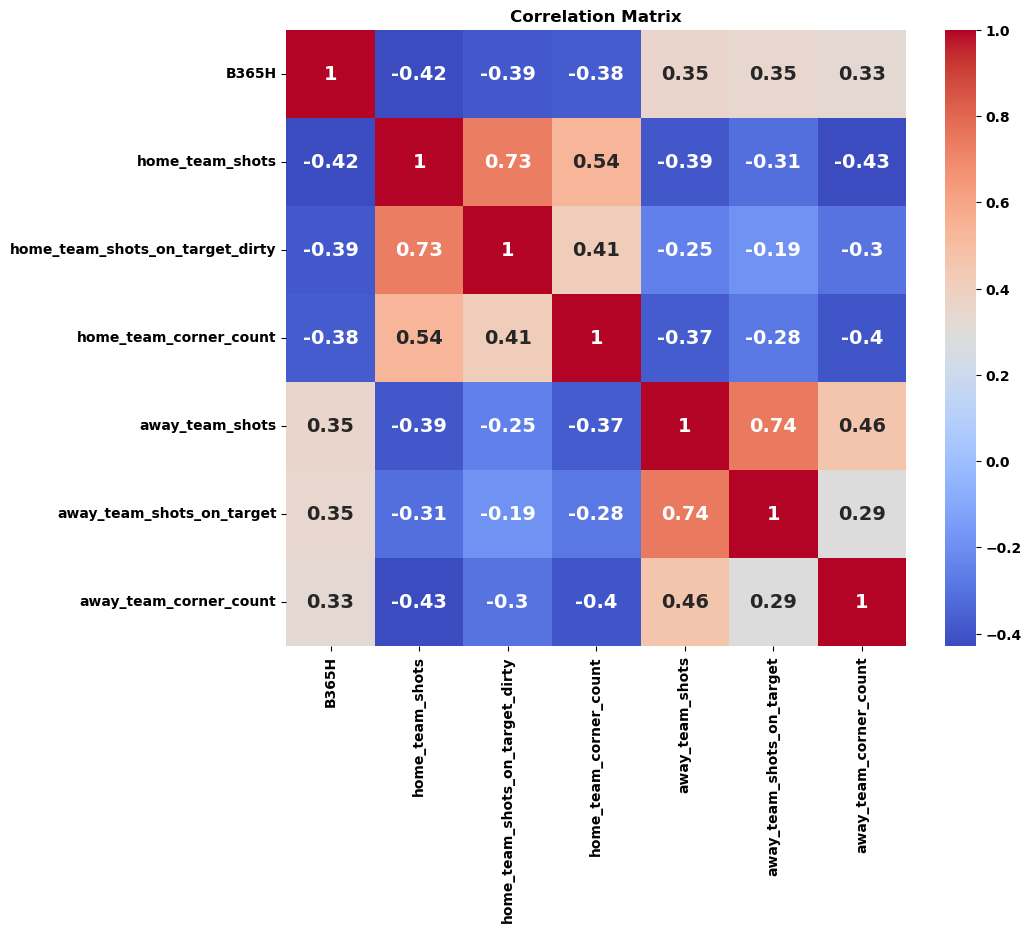

In [98]:
# Selecionar apenas as colunas numéricas
numeric_columns = matches_info_df.select_dtypes(include=['float64', 'int64'])

numeric_columns= numeric_columns[['B365H','home_team_shots', 'home_team_shots_on_target_dirty',
                                   'home_team_corner_count', 'away_team_shots',
                                   'away_team_shots_on_target', 'away_team_corner_count']]

# Calcular a matriz de covariância para os dados do Arsenal
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()

In [99]:
# Matriz de correlação
corr_matrix

,B365H,home_team_shots,home_team_shots_on_target_dirty,home_team_corner_count,away_team_shots,away_team_shots_on_target,away_team_corner_count
B365H,1.000000,-0.423790,-0.387878,-0.375919,0.354509,0.345701,0.327991
home_team_shots,-0.423790,1.000000,0.733592,0.535195,-0.392182,-0.312608,-0.428405
home_team_shots_on_target_dirty,-0.387878,0.733592,1.000000,0.413760,-0.251840,-0.188129,-0.297315
home_team_corner_count,-0.375919,0.535195,0.413760,1.000000,-0.373042,-0.279580,-0.395238
away_team_shots,0.354509,-0.392182,-0.251840,-0.373042,1.000000,0.744171,0.459662
away_team_shots_on_target,0.345701,-0.312608,-0.188129,-0.279580,0.744171,1.000000,0.290645
away_team_corner_count,0.327991,-0.428405,-0.297315,-0.395238,0.459662,0.290645,1.000000


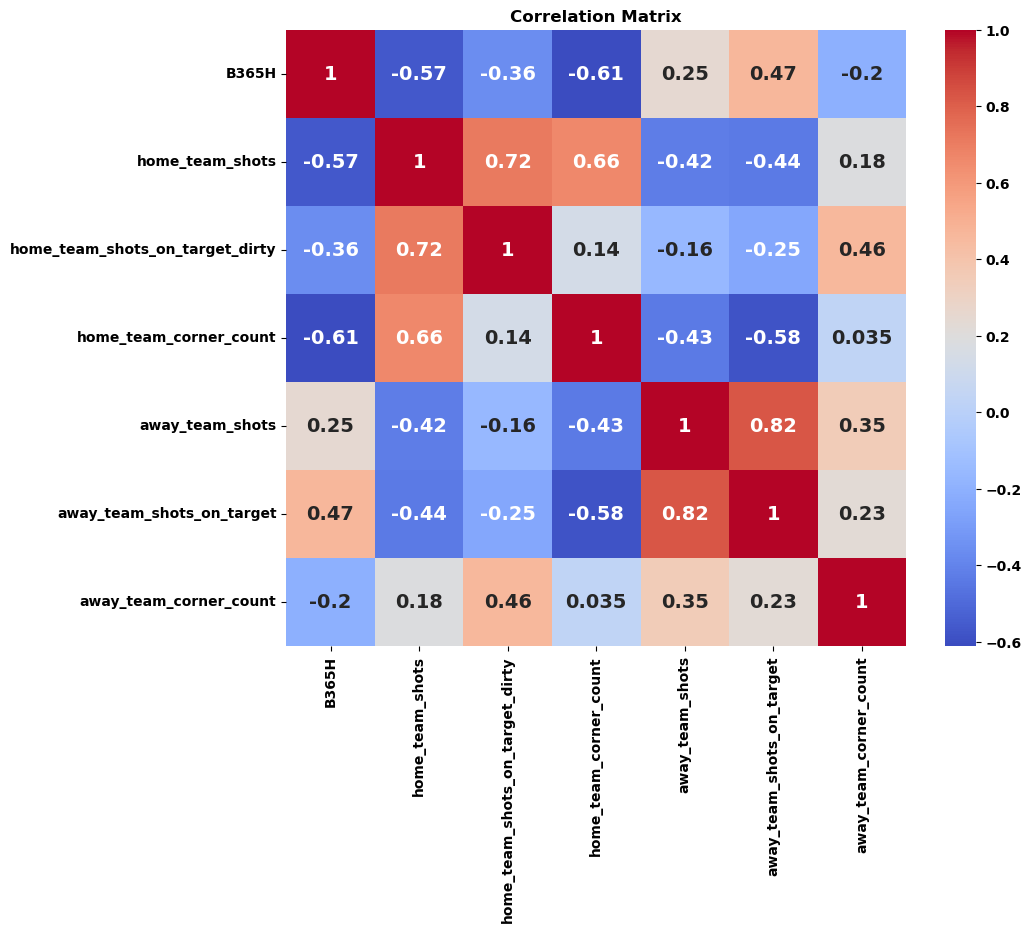

In [100]:
# Filtrar o DataFrame para incluir apenas as linhas onde o time da casa é o Arsenal
city_data = matches_info_df[matches_info_df['home_team_name'] == 'Manchester City']

# Selecionar apenas as colunas numéricas
numeric_columns= city_data[['B365H', 'home_team_shots', 'home_team_shots_on_target_dirty',
                                   'home_team_corner_count', 'away_team_shots',
                                   'away_team_shots_on_target', 'away_team_corner_count']]

# Calcular a matriz de covariância para os dados do Arsenal
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()

In [101]:
# Função para calcular a correlação de Pearson
def calculate_pearson_correlations(group):
    corr_shots_on_target = group['home_team_shots'].corr(group['home_team_shots_on_target_dirty'])
    corr_shots_corners = group['home_team_shots'].corr(group['home_team_corner_count'])
    return pd.Series({
        'corr_shots_on_target': corr_shots_on_target,
        'corr_shots_corners': corr_shots_corners
    })

# Calcular as correlações de Pearson para cada time
correlations = matches_info_df.groupby('home_team_name').apply(calculate_pearson_correlations)

# Ordenar as correlações do menor para o maior pela correlação de chutes e chutes a gol
sorted_correlations = correlations.sort_values(by='corr_shots_on_target', ascending=False)

# Imprimir as correlações ordenadas
print(sorted_correlations)

                         corr_shots_on_target  corr_shots_corners
home_team_name                                                   
Newcastle United                     0.898207            0.447758
Fulham                               0.872698            0.537689
West Ham United                      0.872652            0.571673
Leicester City                       0.799456            0.587877
Tottenham Hotspur                    0.767743            0.296738
Burnley                              0.763840            0.686478
Liverpool                            0.746655            0.424743
Watford                              0.734320            0.059426
Manchester City                      0.715290            0.660763
Huddersfield Town                    0.672862            0.265869
Cardiff City                         0.659418            0.498537
Chelsea                              0.615029            0.253857
Wolverhampton Wanderers              0.594955            0.717588
Crystal Pa

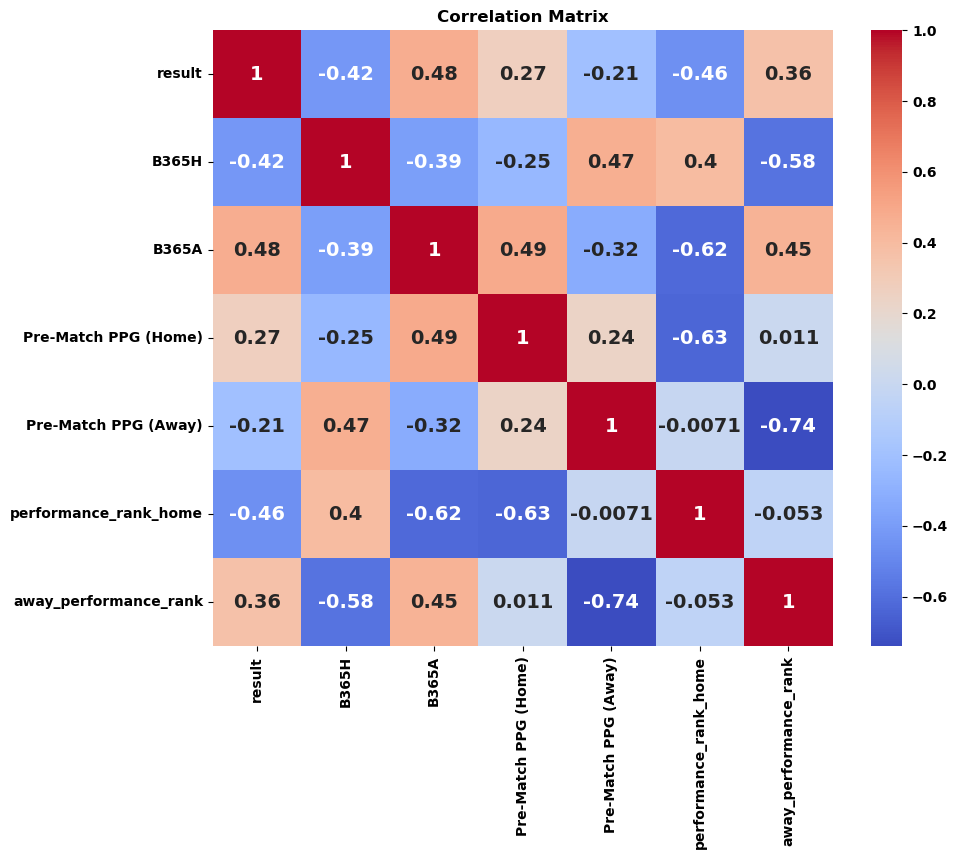

In [102]:
# Selecionar apenas as colunas numéricas
numeric_columns = matches_info_df.select_dtypes(include=['float64', 'int64'])

numeric_columns= numeric_columns[['result', 'B365H', 'B365A','Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'performance_rank_home','away_performance_rank']]

# Calcular a matriz de covariância para os dados do Arsenal
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()